### Importing the libraries

In [75]:
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Reading Data into Dataframe

In [4]:
df = pd.read_csv('MLF_GP1_CreditScore.csv')
df.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


In [5]:
len(df['Rating'].unique())

16

In [32]:
df.columns

Index(['Sales/Revenues', 'Gross Margin', 'EBITDA', 'EBITDA Margin',
       'Net Income Before Extras', 'Total Debt', 'Net Debt', 'LT Debt',
       'ST Debt', 'Cash', 'Free Cash Flow', 'Total Debt/EBITDA',
       'Net Debt/EBITDA', 'Total MV', 'Total Debt/MV', 'Net Debt/MV',
       'CFO/Debt', 'CFO', 'Interest Coverage', 'Total Liquidity',
       'Current Liquidity', 'Current Liabilities', 'EPS Before Extras', 'PE',
       'ROA', 'ROE', 'InvGrd', 'Rating'],
      dtype='object')

### Creating a Correlation Matrix to visualize correlated features

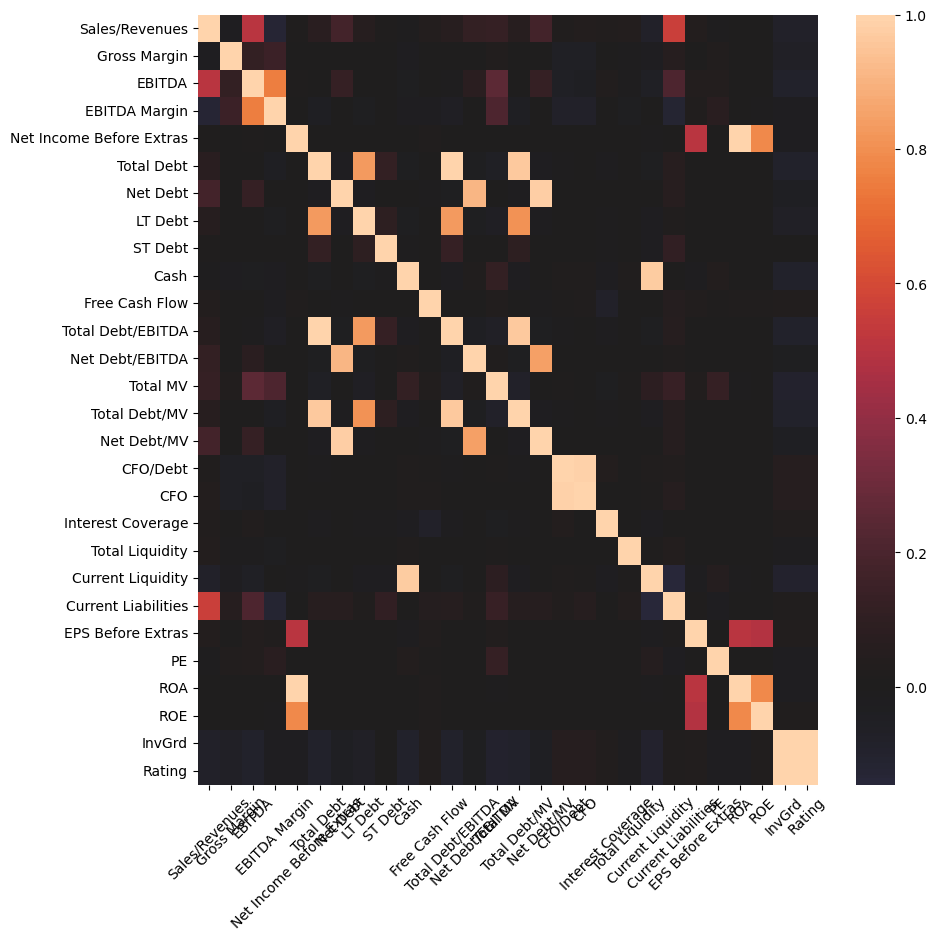

In [8]:
### Reading Data into Dataframecorr = df.corr()

# Set up the figure
fig, ax = plt.subplots(figsize=(10,10))

# Create the heatmap
sns.heatmap(corr, center=0, annot=False, fmt='.2f', ax=ax)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Visualizing Scatter Plot

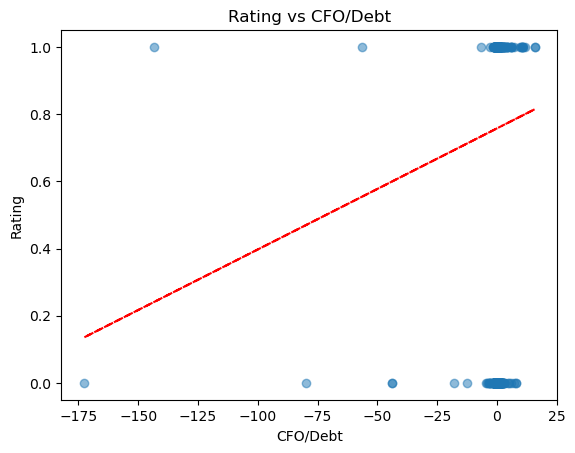

In [45]:
# Select the features to plot
feature1 = 'CFO/Debt'
feature2 = 'Rating'

# Create a scatter plot
plt.scatter(df[feature1], df[feature2], alpha=0.5)

# Add regression line to the scatter plot
z = np.polyfit(df[feature1], df[feature2], 1)
p = np.poly1d(z)
plt.plot(df[feature1], p(df[feature1]), "r--")

# Set axis labels and title
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f"{feature2} vs {feature1}")

# Show the plot
plt.show()

### Linear Regression:

#### To predict the data in this piece of code, two regularized linear regression models, Ridge and Lasso, were utilized. The models' performance was assessed using accuracy and the ROC AUC score. The Ridge model controlled the strength of the regularization using an alpha value of 0.5, which can assist prevent overfitting. Similarly, the Lasso model controlled the strength of the regularization with an alpha value of 0.1. The alpha values were most likely chosen through trial and error, and by utilizing a validation set or cross-validation to optimize the model's performance. The accuracy reflects the number of correctly classified samples, whereas the ROC AUC score measures the model's ability to differentiate between positive and negative classes, taking into account the true positive rate and false positive rate. Following the evaluation of the models, it was discovered that the Ridge model had a better accuracy score and ROC AUC score than the Lasso model, indicating that the Ridge model was more effective in predicting the target variable in this scenario. The decision between the two regularization methods, however, is determined by the specific situation and the intended balance between bias and variance.

In [46]:
# Split data into input features (X) and target variable (y)
X = df.drop(['Rating', 'InvGrd'],axis = 1)
y = df['InvGrd']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model with Ridge regularization to the training data
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)

# Predict on the test set using the Ridge model
y_pred_ridge = ridge_model.predict(X_test)
y_pred_ridge = np.where(y_pred_ridge > 0.5, 1, 0)

# Evaluate the models using accuracy and ROC AUC score
ridge_acc = accuracy_score(y_test, y_pred_ridge)
ridge_auc = roc_auc_score(y_test, y_pred_ridge)

print('Ridge Model Accuracy:', ridge_acc)
print('Ridge Model ROC AUC Score:', ridge_auc)

Ridge Model Accuracy: 0.7676470588235295
Ridge Model ROC AUC Score: 0.5337611607142857


In [47]:
# Split data into input features (X) and target variable (y)
X = df.drop(['Rating', 'InvGrd'],axis = 1)
y = df['InvGrd']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model with Lasso regularization to the training data
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predict on the test set using the Lasso model
y_pred_lasso = lasso_model.predict(X_test)
y_pred_lasso = np.where(y_pred_lasso > 0.5, 1, 0)

lasso_acc = accuracy_score(y_test, y_pred_lasso)
lasso_auc = roc_auc_score(y_test, y_pred_lasso)

print('Lasso Model Accuracy:', lasso_acc)
print('Lasso Model ROC AUC Score:', lasso_auc)

Lasso Model Accuracy: 0.7529411764705882
Lasso Model ROC AUC Score: 0.5039992559523809


### Logistic Regression:
#### We used Ridge and Lasso regularization approaches, which are signified by the 'penalty' parameter being set to either 'l1' or 'l2', to increase the generalization ability of the logistic regression models and prevent overfitting. We used 'sage' solver in Ridge because it is improving the scores. To assure the algorithm's convergence, we set the "max_iter" option to a high value of 10000.
#### To train the models, we first split the data into 80:20 training and test sets using the train_test_split function. We then used MinMaxScaler to check that the input features were all on the same scale.
#### The models were evaluated, and the Lasso regularization model performed better than Ridge. However, the effectiveness of these models is dependent on the individual dataset and features employed, and optimal performance may necessitate hyperparameter optimisation and feature selection.

In [74]:
# RIDGE

# Split data into input features (X) and target variable (y)
X = df.drop(['Rating', 'InvGrd'],axis = 1)
y = df['InvGrd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic regression with Ridge regularization
clf_ridge = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
clf_ridge.fit(X_train, y_train)
y_pred_ridge = clf_ridge.predict(X_test)
acc_ridge = accuracy_score(y_test, y_pred_ridge)
auc_ridge = roc_auc_score(y_test, y_pred_ridge)

print("Accuracy with L1 regularization:", acc_ridge)
print("ROC AUC with L1 regularization:", auc_ridge)

Accuracy with L1 regularization: 0.7558823529411764
ROC AUC with L1 regularization: 0.5072115384615384


In [73]:
# LASSO

# Split data into input features (X) and target variable (y)
X = df.drop(['Rating', 'InvGrd'],axis = 1)
y = df['InvGrd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic regression with Lasso regularization
clf_lasso = LogisticRegression(penalty='l2',max_iter=10000)
clf_lasso.fit(X_train, y_train)
y_pred_lasso = clf_lasso.predict(X_test)
acc_lasso = accuracy_score(y_test, y_pred_lasso)
auc_lasso = roc_auc_score(y_test, y_pred_lasso)

print("Accuracy with L2 regularization:", acc_lasso)
print("ROC AUC with L2 regularization:", auc_lasso)

Accuracy with L2 regularization: 0.7764705882352941
ROC AUC with L2 regularization: 0.5293269230769231


### Neural Network:

#### In the provided code, we used a neural network-based methodology to classify a company's rating into one of the rating categories and predict if it is investment grade. We used the Keras package to define our neural network design.
#### Using the Pandas library, we first loaded the data from the CSV file and then separated it into input (X) and output (y) variables. We employed one-hot encoding to convert the category ratings to binary format, and a mapping dictionary to translate the categorical investment ratings to binary values.
#### The data was divided into training and testing sets using the scikit-learn library's train_test_split technique, with 80% of the data utilized for training and 20% for testing. Our neural network architecture is made up of three layers: an input layer with 1024 neurons, a hidden layer with 512 neurons, and an output layer with the number of categories which are 16. For multi-class classification, we used the relu activation function for the input and hidden layers, and the sigmoid activation function for the output layer. To minimize overfitting, dropout layers with a dropout rate of 0.2 have been introduced after each dense layer. 

#### The model was built using the categorical_crossentropy loss function, the Adam optimizer, and the accuracy metric. The model was then trained using the training data for 200 epochs and a batch size of 16. Finally, we tested the model on real-world data and demonstrated the correctness of the rating classification. The results show that the neural network-based solution is effective for this situation. The model's excellent accuracy in rating categorization implies that it can correctly classify companies into their relevant rating categories. Furthermore, the usage of dropout layers has aided in the prevention of overfitting. 

In [56]:
# load data
data = pd.read_csv('MLF_GP1_CreditScore.csv')

# split into input (X) and output (y) variables
X = data.drop(['Rating', 'InvGrd'], axis=1)
y_rating = pd.get_dummies(data['Rating'])  # one-hot encoding for categorical rating

# split data into training and test sets
X_train, X_test, y_rating_train, y_rating_test = train_test_split(X, y_rating, test_size=0.2)

# define the model
model = Sequential()
model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_rating_train.shape[1], activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_rating_train, epochs=200, batch_size=16,validation_split = 0.1)

# evaluate the model
_, rating_accuracy = model.evaluate(X_test, y_rating_test, verbose=0)

print('Rating Accuracy: %.2f%%' % (rating_accuracy*100))  

Epoch 1/200
77/77 [==============================] - 2s 13ms/step - loss: 4.3479 - accuracy: 0.1495 - val_loss: 4.1627 - val_accuracy: 0.1397
Epoch 2/200
77/77 [==============================] - 1s 10ms/step - loss: 3.3691 - accuracy: 0.1846 - val_loss: 4.0075 - val_accuracy: 0.1397
Epoch 3/200
77/77 [==============================] - 1s 15ms/step - loss: 3.2154 - accuracy: 0.2100 - val_loss: 3.2788 - val_accuracy: 0.1397
Epoch 4/200
77/77 [==============================] - 1s 18ms/step - loss: 3.0059 - accuracy: 0.2320 - val_loss: 3.0370 - val_accuracy: 0.2059
Epoch 5/200
77/77 [==============================] - 1s 15ms/step - loss: 2.6147 - accuracy: 0.2574 - val_loss: 2.9421 - val_accuracy: 0.2279
Epoch 6/200
77/77 [==============================] - 1s 9ms/step - loss: 2.8228 - accuracy: 0.2623 - val_loss: 3.0751 - val_accuracy: 0.1765
Epoch 7/200
77/77 [==============================] - 1s 9ms/step - loss: 2.4819 - accuracy: 0.2663 - val_loss: 3.2285 - val_accuracy: 0.2279
Epoch 8/

77/77 [==============================] - 1s 10ms/step - loss: 1.1054 - accuracy: 0.7794 - val_loss: 3.5084 - val_accuracy: 0.4191
Epoch 59/200
77/77 [==============================] - 1s 10ms/step - loss: 1.1136 - accuracy: 0.7549 - val_loss: 3.4646 - val_accuracy: 0.4118
Epoch 60/200
77/77 [==============================] - 1s 10ms/step - loss: 0.9002 - accuracy: 0.7623 - val_loss: 3.6976 - val_accuracy: 0.4632
Epoch 61/200
77/77 [==============================] - 1s 10ms/step - loss: 0.9524 - accuracy: 0.7590 - val_loss: 3.3580 - val_accuracy: 0.4559
Epoch 62/200
77/77 [==============================] - 1s 10ms/step - loss: 0.8301 - accuracy: 0.7794 - val_loss: 3.5811 - val_accuracy: 0.4559
Epoch 63/200
77/77 [==============================] - 1s 11ms/step - loss: 0.7300 - accuracy: 0.8047 - val_loss: 3.3308 - val_accuracy: 0.4338
Epoch 64/200
77/77 [==============================] - 1s 10ms/step - loss: 0.7175 - accuracy: 0.8088 - val_loss: 3.7349 - val_accuracy: 0.4779
Epoch 65/200

77/77 [==============================] - 3s 41ms/step - loss: 0.4112 - accuracy: 0.9338 - val_loss: 5.6003 - val_accuracy: 0.4853
Epoch 116/200
77/77 [==============================] - 3s 45ms/step - loss: 0.4985 - accuracy: 0.9281 - val_loss: 6.0204 - val_accuracy: 0.4853
Epoch 117/200
77/77 [==============================] - 4s 57ms/step - loss: 0.4068 - accuracy: 0.9297 - val_loss: 5.8651 - val_accuracy: 0.4706
Epoch 118/200
77/77 [==============================] - 4s 52ms/step - loss: 0.5828 - accuracy: 0.9126 - val_loss: 5.4036 - val_accuracy: 0.4779
Epoch 119/200
77/77 [==============================] - 2s 28ms/step - loss: 0.4122 - accuracy: 0.9257 - val_loss: 5.6725 - val_accuracy: 0.4485
Epoch 120/200
77/77 [==============================] - 2s 33ms/step - loss: 0.8142 - accuracy: 0.9077 - val_loss: 5.3291 - val_accuracy: 0.4706
Epoch 121/200
77/77 [==============================] - 1s 17ms/step - loss: 0.4755 - accuracy: 0.9150 - val_loss: 4.9721 - val_accuracy: 0.4632
Epoch 

Epoch 172/200
77/77 [==============================] - 1s 11ms/step - loss: 0.2486 - accuracy: 0.9575 - val_loss: 6.4088 - val_accuracy: 0.5000
Epoch 173/200
77/77 [==============================] - 1s 11ms/step - loss: 0.1874 - accuracy: 0.9608 - val_loss: 6.1107 - val_accuracy: 0.4853
Epoch 174/200
77/77 [==============================] - 1s 11ms/step - loss: 0.1486 - accuracy: 0.9600 - val_loss: 5.9482 - val_accuracy: 0.5221
Epoch 175/200
77/77 [==============================] - 1s 11ms/step - loss: 0.1803 - accuracy: 0.9583 - val_loss: 5.9491 - val_accuracy: 0.5147
Epoch 176/200
77/77 [==============================] - 1s 11ms/step - loss: 0.1785 - accuracy: 0.9551 - val_loss: 6.9687 - val_accuracy: 0.4853
Epoch 177/200
77/77 [==============================] - 1s 11ms/step - loss: 0.1928 - accuracy: 0.9469 - val_loss: 6.1937 - val_accuracy: 0.4853
Epoch 178/200
77/77 [==============================] - 1s 11ms/step - loss: 0.6822 - accuracy: 0.9575 - val_loss: 6.0874 - val_accuracy:

In [57]:
print('Rating Accuracy: %.2f%%' % (rating_accuracy*100))  

Rating Accuracy: 53.82%


### Neural Network:

#### In the provided code, we used a neural network-based methodology to predict if it is investment grade. We used the Keras package to define our neural network design.
#### Using the Pandas library, we first loaded the data from the CSV file and then separated it into input (X) and output (y) variables. We employed one-hot encoding to convert the category ratings to binary format, and a mapping dictionary to translate the categorical investment ratings to binary values.
#### The data was divided into training and testing sets using the scikit-learn library's train_test_split technique, with 80% of the data utilized for training and 20% for testing. Our neural network architecture is made up of three layers: an input layer with 512 neurons, a hidden layer with 256 neurons, and an output layer with 1 neuron to predict whether the data falls under Investment grade or not. For multi-class classification, we used the relu activation function for the input and hidden layers, and the sigmoid activation function for the output layer. To minimize overfitting, dropout layers with a dropout rate of 0.2 have been introduced after each dense layer. 

#### The model was built using the categorical_crossentropy loss function, the Adam optimizer, and the accuracy metric. The model was then trained using the training data for 200 epochs and a batch size of 16. Finally, we tested the model on real-world data and demonstrated the correctness of the rating classification. The results show that the neural network-based solution is effective for this situation. The model's excellent accuracy in rating categorization implies that it can correctly classify companies into their relevant rating categories. Furthermore, the usage of dropout layers has aided in the prevention of overfitting. 

In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# load data
data = pd.read_csv('MLF_GP1_CreditScore.csv') 

# split into input (X) and output (y) variables
X = data.drop(['Rating', 'InvGrd'], axis=1)
y_investment = data['InvGrd']

# split data into training and test sets
X_train, X_test, y_investment_train, y_investment_test = train_test_split(X, y_investment, test_size=0.2)

# define the model
model_2 = Sequential()
model_2.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
model_2.fit(X_train, y_investment_train, epochs=200, batch_size=16, validation_split = 0.1)

# evaluate the model
_, rating_accuracy_2 = model_2.evaluate(X_test, y_investment_test, verbose=0)

print('Rating Accuracy: %.2f%%' % (rating_accuracy_2*100))  

Epoch 1/200
77/77 [==============================] - 1s 4ms/step - loss: 0.9071 - accuracy: 0.7279 - val_loss: 0.6872 - val_accuracy: 0.7941
Epoch 2/200
77/77 [==============================] - 0s 3ms/step - loss: 0.8512 - accuracy: 0.7574 - val_loss: 0.6531 - val_accuracy: 0.7721
Epoch 3/200
77/77 [==============================] - 0s 3ms/step - loss: 0.6011 - accuracy: 0.7712 - val_loss: 0.6053 - val_accuracy: 0.7721
Epoch 4/200
77/77 [==============================] - 0s 3ms/step - loss: 0.7171 - accuracy: 0.7786 - val_loss: 0.6266 - val_accuracy: 0.7647
Epoch 5/200
77/77 [==============================] - 0s 3ms/step - loss: 0.5885 - accuracy: 0.7745 - val_loss: 1.7779 - val_accuracy: 0.7721
Epoch 6/200
77/77 [==============================] - 0s 3ms/step - loss: 0.5099 - accuracy: 0.7933 - val_loss: 0.6493 - val_accuracy: 0.7941
Epoch 7/200
77/77 [==============================] - 0s 4ms/step - loss: 0.5809 - accuracy: 0.7974 - val_loss: 1.3458 - val_accuracy: 0.7721
Epoch 8/200
7

Epoch 59/200
77/77 [==============================] - 0s 3ms/step - loss: 0.1754 - accuracy: 0.9371 - val_loss: 0.5584 - val_accuracy: 0.8529
Epoch 60/200
77/77 [==============================] - 0s 3ms/step - loss: 0.2163 - accuracy: 0.9240 - val_loss: 0.5700 - val_accuracy: 0.8529
Epoch 61/200
77/77 [==============================] - 0s 3ms/step - loss: 0.1827 - accuracy: 0.9314 - val_loss: 0.5757 - val_accuracy: 0.8750
Epoch 62/200
77/77 [==============================] - 0s 3ms/step - loss: 0.1728 - accuracy: 0.9355 - val_loss: 0.8152 - val_accuracy: 0.8603
Epoch 63/200
77/77 [==============================] - 0s 3ms/step - loss: 0.1785 - accuracy: 0.9306 - val_loss: 0.5977 - val_accuracy: 0.8456
Epoch 64/200
77/77 [==============================] - 0s 3ms/step - loss: 0.1806 - accuracy: 0.9322 - val_loss: 0.6066 - val_accuracy: 0.8382
Epoch 65/200
77/77 [==============================] - 0s 3ms/step - loss: 0.1925 - accuracy: 0.9306 - val_loss: 0.5614 - val_accuracy: 0.8603
Epoch 

77/77 [==============================] - 0s 3ms/step - loss: 0.0899 - accuracy: 0.9706 - val_loss: 0.9032 - val_accuracy: 0.8603
Epoch 117/200
77/77 [==============================] - 0s 3ms/step - loss: 0.1291 - accuracy: 0.9673 - val_loss: 1.0472 - val_accuracy: 0.8603
Epoch 118/200
77/77 [==============================] - 0s 3ms/step - loss: 0.0956 - accuracy: 0.9673 - val_loss: 0.8982 - val_accuracy: 0.8309
Epoch 119/200
77/77 [==============================] - 0s 3ms/step - loss: 0.1057 - accuracy: 0.9649 - val_loss: 0.9390 - val_accuracy: 0.8529
Epoch 120/200
77/77 [==============================] - 1s 7ms/step - loss: 0.0590 - accuracy: 0.9796 - val_loss: 0.9060 - val_accuracy: 0.8603
Epoch 121/200
77/77 [==============================] - 0s 5ms/step - loss: 0.0847 - accuracy: 0.9698 - val_loss: 0.9291 - val_accuracy: 0.8235
Epoch 122/200
77/77 [==============================] - 0s 3ms/step - loss: 0.0867 - accuracy: 0.9771 - val_loss: 1.0232 - val_accuracy: 0.8529
Epoch 123/200

77/77 [==============================] - 0s 3ms/step - loss: 0.0672 - accuracy: 0.9771 - val_loss: 1.8361 - val_accuracy: 0.8162
Epoch 174/200
77/77 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9763 - val_loss: 1.2577 - val_accuracy: 0.8456
Epoch 175/200
77/77 [==============================] - 0s 3ms/step - loss: 0.0643 - accuracy: 0.9828 - val_loss: 1.2273 - val_accuracy: 0.8456
Epoch 176/200
77/77 [==============================] - 0s 3ms/step - loss: 0.0814 - accuracy: 0.9812 - val_loss: 1.2431 - val_accuracy: 0.8529
Epoch 177/200
77/77 [==============================] - 0s 3ms/step - loss: 0.0676 - accuracy: 0.9771 - val_loss: 1.2937 - val_accuracy: 0.8456
Epoch 178/200
77/77 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.9788 - val_loss: 1.3553 - val_accuracy: 0.8309
Epoch 179/200
77/77 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9788 - val_loss: 1.3650 - val_accuracy: 0.8603
Epoch 180/200

In [61]:
print('Rating Accuracy: %.2f%%' % (rating_accuracy_2*100))  

Rating Accuracy: 84.41%
